In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

In [3]:
data = pd.read_csv('D:\\CC\\Topic 4\\Dataset_CC.csv')

In [4]:
df = data.copy() 
df.head()

,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud
0,0,1/1/2019 0:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.isnull().sum() #To check the null values#

S.No                    0
Transaction_DateTime    0
CreditCardNumber        0
MerchantName            0
MerchantCategory        0
Amount                  0
FirstName               0
LastName                0
Gender                  0
Street                  0
City                    0
State                   0
ZipCode                 0
Customer_Latitude       0
Customer_Longitude      0
CityPopulation          0
CustomerOccupation      0
CutomerDOB              0
TransactionID           0
SystemTime              0
Merchant_Latitude       0
Merchant_Longitude      0
Is_Fraud                0
dtype: int64

In [6]:
df.dtypes #To check Data type of the variables#

S.No                      int64
Transaction_DateTime     object
CreditCardNumber        float64
MerchantName             object
MerchantCategory         object
Amount                  float64
FirstName                object
LastName                 object
Gender                   object
Street                   object
City                     object
State                    object
ZipCode                   int64
Customer_Latitude       float64
Customer_Longitude      float64
CityPopulation            int64
CustomerOccupation       object
CutomerDOB               object
TransactionID            object
SystemTime                int64
Merchant_Latitude       float64
Merchant_Longitude      float64
Is_Fraud                  int64
dtype: object

In [7]:
df.shape #To identify number of rows and columns in dataset#

(1048575, 23)

In [8]:
df["Transaction_DateTime"] = pd.to_datetime(df['Transaction_DateTime'])

In [9]:
df.dtypes['Transaction_DateTime']

dtype('<M8[ns]')

In [10]:
df["CutomerDOB"] = pd.to_datetime(df['CutomerDOB'])

In [11]:
df.dtypes['CutomerDOB']

dtype('<M8[ns]')

<AxesSubplot:xlabel='Is_Fraud', ylabel='count'>

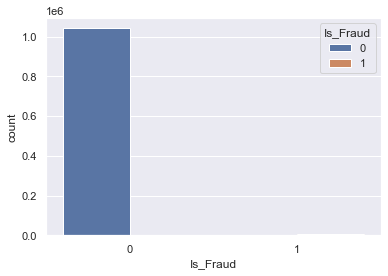

In [12]:
sns.countplot(x=df.Is_Fraud, hue=df.Is_Fraud)

In [13]:
desc= round(df.describe(),3)  #To get the descriptiv statistics of the dataset#
desc

,S.No,CreditCardNumber,Amount,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,524287.000000,417179950519735232.000000,70.279000,48801.591000,38.533000,-90.226000,89057.759000,1344905832.779000,38.533000,-90.226000,0.006000
std,302697.674000,1308892727784082688.000000,159.952000,26898.040000,5.077000,13.759000,302435.058000,10196997.484000,5.111000,13.771000,0.075000
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027000,-165.672000,23.000000,1325376018.000000,19.028000,-166.671000,0.000000
25%,262143.500000,180000000000000.000000,9.640000,26237.000000,34.620000,-96.798000,743.000000,1336682353.000000,34.730000,-96.899000,0.000000
50%,524287.000000,3520000000000000.000000,47.450000,48174.000000,39.354000,-87.477000,2456.000000,1344901521.000000,39.363000,-87.439000,0.000000
75%,786430.500000,4640000000000000.000000,83.050000,72042.000000,41.940000,-80.158000,20328.000000,1354366012.000000,41.956000,-80.232000,0.000000
max,1048574.000000,4990000000000001024.000000,28948.900000,99783.000000,66.693000,-67.950000,2906700.000000,1362931730.000000,67.510000,-66.951000,1.000000


In [14]:
Describe_Amount=round(df["Amount"].describe(),3)
Describe_Amount

count   1048575.000000
mean         70.279000
std         159.952000
min           1.000000
25%           9.640000
50%          47.450000
75%          83.050000
max       28948.900000
Name: Amount, dtype: float64

In [15]:
Describe_Fraud=round(df["Is_Fraud"].describe(),3)
Describe_Fraud

count   1048575.000000
mean          0.006000
std           0.075000
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Is_Fraud, dtype: float64

In [16]:
count=df.Is_Fraud.value_counts()
percentage=((df.Is_Fraud.value_counts())/sum(df.Is_Fraud.value_counts())*100)
fraud=pd.concat( [count,percentage], axis=1)
fraud.columns=['Count','Percentage']
fraud

,Count,Percentage
0,1042569,99.427223
1,6006,0.572777


In [17]:
valid_txns=df[df['Is_Fraud']==0] #Created a DF for valid transactions#
valid_txns


,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud
0,0,2019-01-01 00:00:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:00,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:00,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,2020-03-10 16:07:00,6010000000000000.000000,fraud_Fadel Inc,health_fitness,77.000000,Haley,Wagner,F,05561 Farrell Crescent,Annapolis,MD,21405,39.030500,-76.551500,92106,"Accountant, chartered certified",1943-05-28,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0
1048571,1048571,2020-03-10 16:07:00,4840000000000000.000000,"fraud_Cremin, Hamill and Reichel",misc_pos,116.940000,Meredith,Campbell,F,043 Hanson Turnpike,Hedrick,IA,52563,41.182600,-92.309700,1583,Geochemist,1999-06-28,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0
1048572,1048572,2020-03-10 16:08:00,572000000000.000000,"fraud_O'Connell, Botsford and Hand",home,21.270000,Susan,Mills,F,005 Cody Estates,Louisville,KY,40202,38.250700,-85.747600,736284,Engineering geologist,1952-04-02,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0
1048573,1048573,2020-03-10 16:08:00,4650000000000000000.000000,fraud_Thompson-Gleason,health_fitness,9.520000,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.732000,-73.100000,4056,Film/video editor,1990-06-25,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0


In [18]:
fraud_txns=df[df['Is_Fraud']==1] #Created a DF for fraud transactions#
fraud_txns

,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud
2449,2449,2019-01-02 01:06:00,4610000000000.000000,fraud_Rutherford-Mertz,grocery_pos,281.060000,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.994600,-81.726600,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:00,340000000000000.000000,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.520000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440000,-98.459000,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:00,340000000000000.000000,fraud_Goodwin-Nitzsche,grocery_pos,276.310000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440000,-98.459000,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:00,4610000000000.000000,fraud_Erdman-Kertzmann,gas_transport,7.030000,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.994600,-81.726600,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:00,340000000000000.000000,fraud_Koepp-Parker,grocery_pos,275.730000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440000,-98.459000,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047089,1047089,2020-03-10 03:59:00,3590000000000000.000000,fraud_Kris-Weimann,misc_net,690.490000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,fb1ddd251bbec9b84c9755e856d51723,1362887989,43.254214,-98.267759,1
1047157,1047157,2020-03-10 04:31:00,3550000000000000.000000,"fraud_Casper, Hand and Zulauf",grocery_pos,324.740000,Jordan,May,M,1626 Susan Course,Aledo,TX,76008,32.700400,-97.603900,13602,Optometrist,1984-07-05,4dca0549e43b7e265cae7fd8a7e563b4,1362889904,33.607221,-97.996506,1
1047208,1047208,2020-03-10 04:59:00,3590000000000000.000000,fraud_Kiehn Inc,grocery_pos,331.330000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,d18c55035998e461aa9040e254b74925,1362891561,44.228731,-98.330520,1
1047521,1047521,2020-03-10 08:22:00,3590000000000000.000000,fraud_Rau and Sons,grocery_pos,356.200000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,bdaeb5e3413a408d7e6c3720a35337d5,1362903771,43.988931,-97.989985,1


In [19]:
describe_fraud_txns=round(fraud_txns['Amount'].describe(),2) #Describe fraud transactions#
describe_fraud_txns

count   6006.000000
mean     530.570000
std      391.330000
min        1.180000
25%      241.580000
50%      391.160000
75%      901.950000
max     1371.810000
Name: Amount, dtype: float64

In [20]:
describe_valid_txns=round(valid_txns['Amount'].describe(),2) #Describe valid transactions#
describe_valid_txns

count   1042569.000000
mean         67.630000
std         153.700000
min           1.000000
25%           9.600000
50%          47.220000
75%          82.470000
max       28948.900000
Name: Amount, dtype: float64

In [21]:
Txns_distribution=pd.concat( [describe_valid_txns,describe_fraud_txns], axis=1) #Concat the summary of fraud and valid transactions in one table#
Txns_distribution.columns=['Summary of Valid transactions','Summary of Fraud transactions']
Txns_distribution

,Summary of Valid transactions,Summary of Fraud transactions
count,1042569.000000,6006.000000
mean,67.630000,530.570000
std,153.700000,391.330000
min,1.000000,1.180000
25%,9.600000,241.580000
50%,47.220000,391.160000
75%,82.470000,901.950000
max,28948.900000,1371.810000


In [22]:
fraud_txns=df[df['Is_Fraud']==1]
fraud_txns

,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud
2449,2449,2019-01-02 01:06:00,4610000000000.000000,fraud_Rutherford-Mertz,grocery_pos,281.060000,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.994600,-81.726600,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:00,340000000000000.000000,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.520000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440000,-98.459000,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:00,340000000000000.000000,fraud_Goodwin-Nitzsche,grocery_pos,276.310000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440000,-98.459000,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:00,4610000000000.000000,fraud_Erdman-Kertzmann,gas_transport,7.030000,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.994600,-81.726600,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:00,340000000000000.000000,fraud_Koepp-Parker,grocery_pos,275.730000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440000,-98.459000,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047089,1047089,2020-03-10 03:59:00,3590000000000000.000000,fraud_Kris-Weimann,misc_net,690.490000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,fb1ddd251bbec9b84c9755e856d51723,1362887989,43.254214,-98.267759,1
1047157,1047157,2020-03-10 04:31:00,3550000000000000.000000,"fraud_Casper, Hand and Zulauf",grocery_pos,324.740000,Jordan,May,M,1626 Susan Course,Aledo,TX,76008,32.700400,-97.603900,13602,Optometrist,1984-07-05,4dca0549e43b7e265cae7fd8a7e563b4,1362889904,33.607221,-97.996506,1
1047208,1047208,2020-03-10 04:59:00,3590000000000000.000000,fraud_Kiehn Inc,grocery_pos,331.330000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,d18c55035998e461aa9040e254b74925,1362891561,44.228731,-98.330520,1
1047521,1047521,2020-03-10 08:22:00,3590000000000000.000000,fraud_Rau and Sons,grocery_pos,356.200000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,bdaeb5e3413a408d7e6c3720a35337d5,1362903771,43.988931,-97.989985,1


<AxesSubplot:xlabel='Amount'>

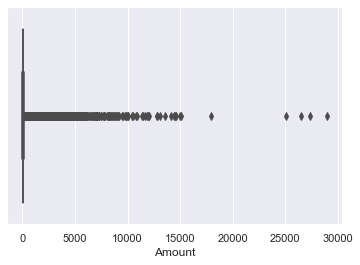

In [23]:
sns.boxplot(df['Amount'])

In [24]:
print(np.where(df['Amount']>15000))

(array([150564, 187885, 352894, 606211, 752016, 787549, 793677],
      dtype=int64),)


<AxesSubplot:xlabel='Amount'>

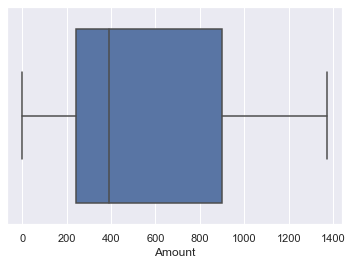

In [25]:
sns.boxplot(fraud_txns['Amount'])

In [26]:
# IQR
Q1 = np.percentile(fraud_txns['Amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(fraud_txns['Amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

Q2 = np.percentile(fraud_txns['Amount'], 50,
                   interpolation = 'midpoint')

In [27]:
IQR

660.1850000000001

In [28]:
# Upper bound
upper_bound = Q3+1.5*IQR
# Lower bound
lower_bound = Q1-1.5*IQR

In [29]:
print("The Upper Limit is:",round(upper_bound,2))
print("The lower Limit is:",round(lower_bound,2))
print("The Quartile 1 is:",round(Q1,2))
print("The Quartile 2 is:",round(Q2,2))
print("The Quartile 3 is:",round(Q3,2))
print("The Inter Quartile Range is:", round(IQR,2))

The Upper Limit is: 1892.19
The lower Limit is: -748.55
The Quartile 1 is: 241.73
The Quartile 2 is: 391.16
The Quartile 3 is: 901.91
The Inter Quartile Range is: 660.18


In [30]:
df['Transaction_hour'] = df['Transaction_DateTime'].dt.hour
df['Transaction_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1048570    16
1048571    16
1048572    16
1048573    16
1048574    16
Name: Transaction_hour, Length: 1048575, dtype: int64

In [31]:
df['Year_Month'] = df['Transaction_DateTime'].dt.to_period('M')
df['Year_Month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1048570    2020-03
1048571    2020-03
1048572    2020-03
1048573    2020-03
1048574    2020-03
Name: Year_Month, Length: 1048575, dtype: period[M]

In [32]:
df.head()

,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud,Transaction_hour,Year_Month
0,0,2019-01-01 00:00:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2019-01
1,1,2019-01-01 00:00:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2019-01
2,2,2019-01-01 00:00:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2019-01
3,3,2019-01-01 00:01:00,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2019-01
4,4,2019-01-01 00:03:00,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2019-01


In [33]:
df.dtypes

S.No                             int64
Transaction_DateTime    datetime64[ns]
CreditCardNumber               float64
MerchantName                    object
MerchantCategory                object
Amount                         float64
FirstName                       object
LastName                        object
Gender                          object
Street                          object
City                            object
State                           object
ZipCode                          int64
Customer_Latitude              float64
Customer_Longitude             float64
CityPopulation                   int64
CustomerOccupation              object
CutomerDOB              datetime64[ns]
TransactionID                   object
SystemTime                       int64
Merchant_Latitude              float64
Merchant_Longitude             float64
Is_Fraud                         int64
Transaction_hour                 int64
Year_Month                   period[M]
dtype: object

In [34]:
MerchantCategory_onehot = pd.get_dummies(df.MerchantCategory, prefix='MerchantCategory', drop_first=True)
Gender_onehot = pd.get_dummies(df.Gender, prefix='Gender', drop_first=True)
State_onehot = pd.get_dummies(df.State, prefix='State', drop_first=True)


In [35]:
df_new = pd.concat([df, MerchantCategory_onehot,Gender_onehot, State_onehot], axis=1)

df_new.head()

,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,Customer_Latitude,Customer_Longitude,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,SystemTime,Merchant_Latitude,Merchant_Longitude,Is_Fraud,Transaction_hour,Year_Month,MerchantCategory_food_dining,MerchantCategory_gas_transport,MerchantCategory_grocery_net,MerchantCategory_grocery_pos,MerchantCategory_health_fitness,MerchantCategory_home,MerchantCategory_kids_pets,MerchantCategory_misc_net,MerchantCategory_misc_pos,MerchantCategory_personal_care,MerchantCategory_shopping_net,MerchantCategory_shopping_pos,MerchantCategory_travel,Gender_M,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,2019-01-01 00:00:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2019-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2019-01-01 00:00:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2019-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2019-01-01 00:00:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:00,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2019-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:00,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2019-01,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
df_new.dtypes

S.No                                        int64
Transaction_DateTime               datetime64[ns]
CreditCardNumber                          float64
MerchantName                               object
MerchantCategory                           object
Amount                                    float64
FirstName                                  object
LastName                                   object
Gender                                     object
Street                                     object
City                                       object
State                                      object
ZipCode                                     int64
Customer_Latitude                         float64
Customer_Longitude                        float64
CityPopulation                              int64
CustomerOccupation                         object
CutomerDOB                         datetime64[ns]
TransactionID                              object
SystemTime                                  int64


In [37]:
 df_dropped_cols=df_new.drop(["Customer_Latitude","Customer_Longitude","SystemTime","Merchant_Latitude", "Merchant_Longitude"], axis=1)
    #Dropping Columns#

In [38]:
df_dropped_cols.columns

Index(['S.No', 'Transaction_DateTime', 'CreditCardNumber', 'MerchantName',
       'MerchantCategory', 'Amount', 'FirstName', 'LastName', 'Gender',
       'Street', 'City', 'State', 'ZipCode', 'CityPopulation',
       'CustomerOccupation', 'CutomerDOB', 'TransactionID', 'Is_Fraud',
       'Transaction_hour', 'Year_Month', 'MerchantCategory_food_dining',
       'MerchantCategory_gas_transport', 'MerchantCategory_grocery_net',
       'MerchantCategory_grocery_pos', 'MerchantCategory_health_fitness',
       'MerchantCategory_home', 'MerchantCategory_kids_pets',
       'MerchantCategory_misc_net', 'MerchantCategory_misc_pos',
       'MerchantCategory_personal_care', 'MerchantCategory_shopping_net',
       'MerchantCategory_shopping_pos', 'MerchantCategory_travel', 'Gender_M',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'Stat

In [39]:
df_update=df_dropped_cols

txns_count = df_update[df_update['Is_Fraud'] == 0].shape[0] #df_update[df_update['Is_Fraud'] == 1].shape
fraud_set = df_update[df_update['Is_Fraud'] == 1]
valid_set = df_update[df_update['Is_Fraud'] == 0]
df_sample_fraud = fraud_set.sample(txns_count, replace=True)
df_final = pd.concat([valid_set, df_sample_fraud], axis=0)
df_final.head()


,S.No,Transaction_DateTime,CreditCardNumber,MerchantName,MerchantCategory,Amount,FirstName,LastName,Gender,Street,City,State,ZipCode,CityPopulation,CustomerOccupation,CutomerDOB,TransactionID,Is_Fraud,Transaction_hour,Year_Month,MerchantCategory_food_dining,MerchantCategory_gas_transport,MerchantCategory_grocery_net,MerchantCategory_grocery_pos,MerchantCategory_health_fitness,MerchantCategory_home,MerchantCategory_kids_pets,MerchantCategory_misc_net,MerchantCategory_misc_pos,MerchantCategory_personal_care,MerchantCategory_shopping_net,MerchantCategory_shopping_pos,MerchantCategory_travel,Gender_M,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,2019-01-01 00:00:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,0,0,2019-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2019-01-01 00:00:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,0,0,2019-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2019-01-01 00:00:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,0,0,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:00,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,0,0,2019-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:00,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,0,0,2019-01,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [40]:
X_column = ['Amount','CityPopulation', 'Transaction_hour',
        'MerchantCategory_food_dining', 'MerchantCategory_gas_transport',
       'MerchantCategory_grocery_net', 'MerchantCategory_grocery_pos',
       'MerchantCategory_health_fitness', 'MerchantCategory_home', 'MerchantCategory_kids_pets',
       'MerchantCategory_misc_net', 'MerchantCategory_misc_pos', 'MerchantCategory_personal_care',
       'MerchantCategory_shopping_net', 'MerchantCategory_shopping_pos', 'MerchantCategory_travel',
       'Gender_M', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY']
Y_column = ['Is_Fraud']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final[X_column],df_final[Y_column] ,
train_size=0.7, test_size=0.3, random_state=10)


In [42]:
X_train.shape

(1459596, 67)

In [43]:
X_test.shape

(625542, 67)

In [44]:
from sklearn.linear_model import LogisticRegression
Model_log = LogisticRegression(random_state=10) #Building Logistic Regression Model#

In [45]:
Model_log.fit(X_train , y_train)

LogisticRegression(random_state=10)

In [46]:
y_train_data_prediction = Model_log.predict(X_train)
y_test_data_prediction = Model_log.predict(X_test) #Prediction of future samples#

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

print(confusion_matrix(y_train, y_train_data_prediction))
print(classification_report(y_train, y_train_data_prediction))

[[592432 137078]
 [179287 550799]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79    729510
           1       0.80      0.75      0.78    730086

    accuracy                           0.78   1459596
   macro avg       0.78      0.78      0.78   1459596
weighted avg       0.78      0.78      0.78   1459596



In [48]:
#Confusion Matrix#
TN, FP, FN, TP = confusion_matrix(y_test, y_test_data_prediction).ravel()
confusion_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [TP, FP],
        'Predicted Not Fraud': [FN, TN]
    }, index=['Fraud', 'Not Fraud'])
confusion_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,236582,75901
Not Fraud,58639,254420


<AxesSubplot:>

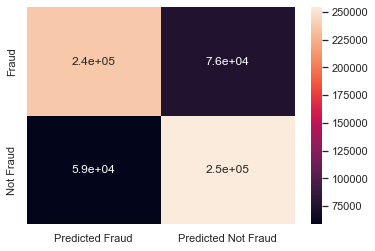

In [49]:
sns.heatmap(confusion_matrix, annot=True)

In [50]:
model_pred_test_probability = Model_log.predict_proba(X_test)[:, 1] #probabilites of Fraud happening#

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

In [52]:
model_lr_auc = roc_auc_score(y_test, model_pred_test_probability)
model_lr_auc

0.8439401950252163

In [53]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'upper left')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

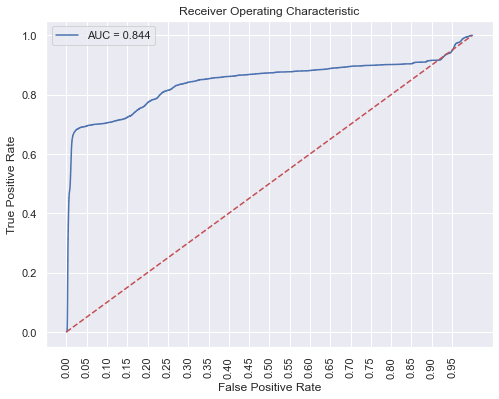

In [54]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = Model_log.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, model_pred_test_probability)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr,tpr,roc_auc)

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
Model_NB = GaussianNB()

In [57]:
Model_NB.fit(X_train, y_train)

GaussianNB()

In [58]:
NB_prediction = Model_NB.predict(X_test)
NB_prediction_probability = Model_NB.predict_proba(X_test)[:, 1]

In [59]:
print(confusion_matrix(y_test, NB_prediction))
print(classification_report(y_test, NB_prediction))



[[307081   5978]
 [118088 194395]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83    313059
           1       0.97      0.62      0.76    312483

    accuracy                           0.80    625542
   macro avg       0.85      0.80      0.80    625542
weighted avg       0.85      0.80      0.80    625542



In [60]:
#Confusion Matrix#
TN, FP, FN, TP = confusion_matrix(y_test, y_test_data_prediction).ravel()
confusion_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [TP, FP],
        'Predicted Not Fraud': [FN, TN]
    }, index=['Fraud', 'Not Fraud'])
confusion_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,236582,75901
Not Fraud,58639,254420


<AxesSubplot:>

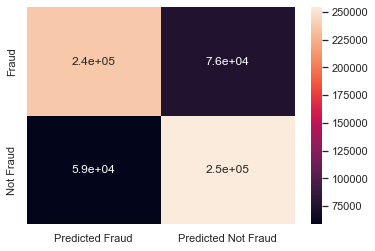

In [61]:
#Heat Map
sns.heatmap(confusion_matrix, annot=True)

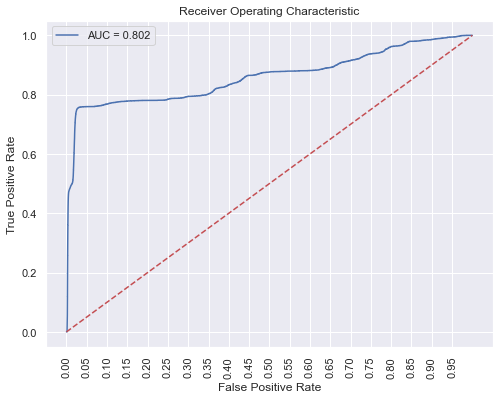

In [62]:
Model_NB_auc = roc_auc_score(y_test, NB_prediction)
fpr, tpr, threshold = metrics.roc_curve(y_test, NB_prediction_probability)
plot_roc_curve(fpr,tpr,Model_NB_auc)


In [63]:
nb_recall = recall_score(y_test, NB_prediction)
nb_recall

0.6220978421226114

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#Decision Tree Classifier#
DTree = DecisionTreeClassifier(criterion="entropy", max_depth=3) 
# Train Decision Tree Classifer
Dtree = DTree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DTree.predict(X_test)

In [66]:
#Confusion Matrix#
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [TP, FP],
        'Predicted Not Fraud': [FN, TN]
    }, index=['Fraud', 'Not Fraud'])
confusion_matrix

TypeError: 'DataFrame' object is not callable

<AxesSubplot:>

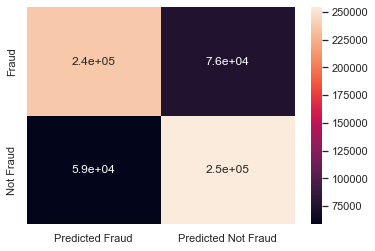

In [67]:
#Heat Map
sns.heatmap(confusion_matrix, annot=True)

In [88]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.91191612, 0.89839401])

In [68]:
#Printing Confusion matrix and Performance Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TypeError: 'DataFrame' object is not callable

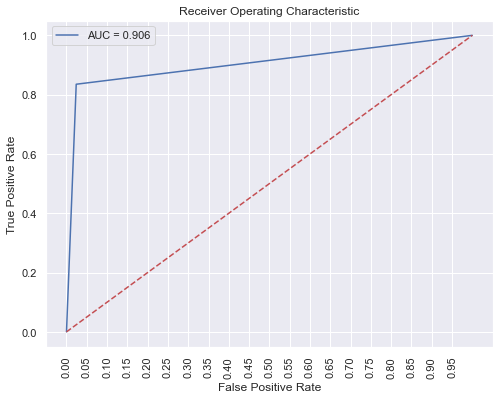

In [69]:
#Creating ROC Curve
DTrees_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
plot_roc_curve(fpr,tpr,DTrees_auc)

In [70]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

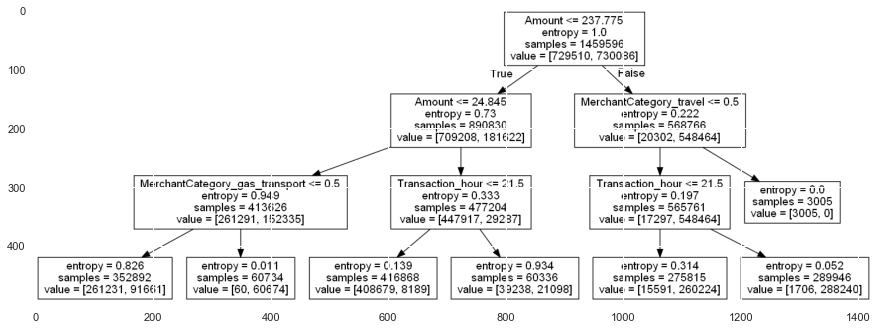

In [71]:
data = tree.export_graphviz(DTree, out_file=None, feature_names=X_column)
plt.figure(figsize=(15, 15))
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree.png')

img=pltimg.imread('decisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [72]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clf_list = [(Model_log, 'Logistic'),
            (Model_NB, 'Naive Bayes'),
            (DTree, 'Decision Tree')]

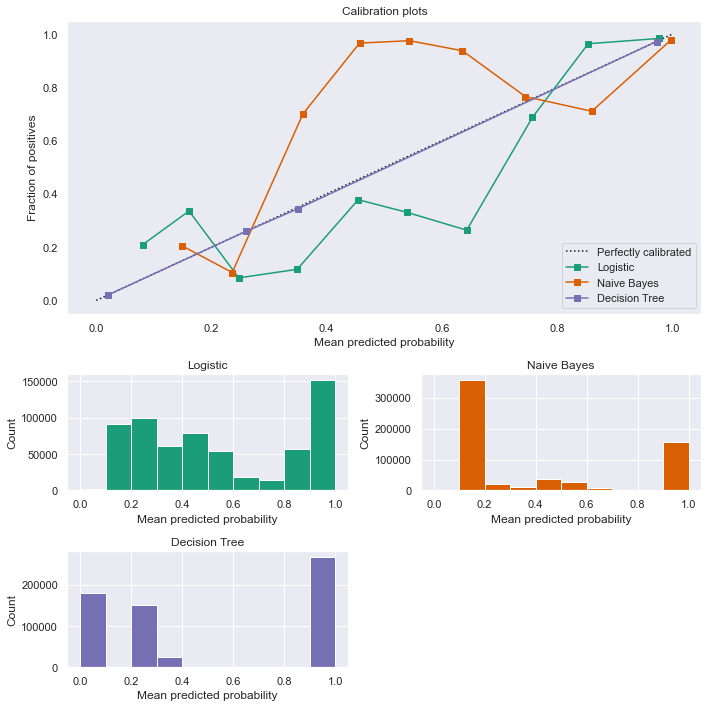

In [73]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap('Dark2')

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf, X_test, y_test, n_bins=10, name=name, ax=ax_calibration_curve,
        color=colors(i)
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title('Calibration plots')

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob, range=(0, 1), bins=10, label=name,
        color=colors(i)
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")
    
plt.tight_layout()
plt.show()

In [86]:
#Test and train Split Accuray
acc_test=Dtree.score(X_test,y_test)*100
acc_train=Dtree.score(X_train,y_train)*100
print('test:',acc_test)
print('train:',acc_train)


test: 90.56370315662258
train: 90.52443278825099


In [74]:
#Gini Coefficient
Gini_Dtree= 2*(DTrees_auc)-1

Gini_Dtree

0.8111443193877319

In [78]:
#R-square  
from sklearn.metrics import r2_score
test_score = r2_score(y_test, y_pred) 
#print(f'Out-of-bag R-2 score estimate: {rfr.obb_score:>5.3}') 
print(f'Test data R-2 score: {test_score:>5.3}') 


Test data R-2 score: 0.623


In [81]:
#Spearman Correlation 
from scipy.stats import spearmanr, pearsonr 
spearman = spearmanr(y_test, y_pred) 
print(f'Test data Spearman correlation: {spearman[0]:.3}') 


Test data Spearman correlation: 0.819


In [84]:
#RMSE 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler 
mse=mean_squared_error(y_test,y_pred) 
rmse=np.sqrt(mse) 
print('Root-Mean-Square Error (RMSE):',rmse) 


Root-Mean-Square Error (RMSE): 0.30718556026248084
